In [2]:
from networkx.algorithms import bipartite
import csv
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [3]:
movies = []
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder']

In [4]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Andrew Garfield',
 'Angelina Jolie',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brie Larson',
 'Cate Blanchett',
 'Chadwick Boseman',
 'Chiswetel Ejiofor',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Corey Stall',
 'Dave Bautista',
 'David Harbour',
 'Don Cheadle',
 'Edward Norton',
 'Elisabeth Olsen',
 'Evangeline Lilly',
 'Florence Pugh',
 'Gemma Chan',
 'Guy Pearce',
 'Gweneth Paltrow',
 'Hugo Weaving',
 'Idris Elba',
 'Jacob Batalon',
 'Jake Gyllenhaal',
 'Jeremy Renner',
 'Josh Brolin',
 'Kumail Nanjiani',
 'Letitia Wright',
 'Liv Tyler',
 "Lupita Nyong'o",
 'Mark Ruffalo',
 'Martin Freeman',
 'Mengâ€™er Zhang',
 'Michael B. Jordan',
 'Michael Douglas',
 'Michael Keaton',
 'Micheal Pena',
 'Mickey Rourke',
 'Natalie Portman',
 'Paul Rudd',
 'Racheal McAdams',
 'Rachel Weisz',
 'Richard Madden',
 'Robert Dow

In [5]:
G = nx.Graph()

In [6]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from(movies,bipartite='Movies')

In [7]:
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [8]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G))


Actors :  ['Zoe Saldana', 'Richard Madden', 'Hugo Weaving', 'Tessa Thompson', 'Anthony Mackie', 'Cate Blanchett', 'Vin Diesel', 'Michael Keaton', 'Jacob Batalon', 'Robert Downey Jr.', 'Dave Bautista', 'Gemma Chan', 'Kumail Nanjiani', 'Michael Douglas', 'Anthony Hopkins', 'Mark Ruffalo', 'Taika Waititi', 'Gweneth Paltrow', 'Evangeline Lilly', 'Chadwick Boseman', 'Bradley Cooper', 'Chris Patt', 'Tom Hiddleston', 'Ben Mendelsohn', 'Bradely Cooper', 'Samuel L. Jackson', 'Chris Hemsworth', 'Elisabeth Olsen', 'Zendaya', 'Mengâ€™er Zhang', 'Sebastian Stan', 'Liv Tyler', 'Awkwafina', 'Chiswetel Ejiofor', 'Paul Rudd', 'Mickey Rourke', 'Brie Larson', 'Xochiti Gomez', 'Simu Liu', 'Micheal Pena', 'Idris Elba', 'Corey Stall', 'Florence Pugh', 'Racheal McAdams', 'Benedict Wong', 'David Harbour', 'Edward Norton', 'Andrew Garfield', 'Benedict Cumberbatch', 'Ben Kingsley', 'Terrence Howard', 'Natalie Portman', 'Tom Holland', 'Jake Gyllenhaal', 'Guy Pearce', 'Scarlett Johansson', 'Rachel Weisz', 'Angeli

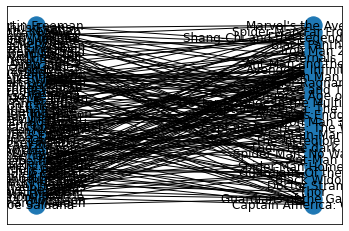

In [9]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [10]:
nx.write_gexf(G,'MCU_character.gexf')

In [15]:
from networkx.algorithms import bipartite
B = nx.weighted_projected_graph(G, actors, ratio=False)
list(B)

AttributeError: module networkx has no attribute weighted_projected_graph